## Final Project Submission

Please fill out:
* Student name: Marvin O. Agumba
* Student pace: Part Tme
* Scheduled project review date/time: 10th February 2023
* Instructor name: 
* Blog post URL:


# Project Objective/Purpose:

To influence Microsoft New Movie Studio Leadership on the nature of movies to invest in pre-release. 

__Importing necessary libraries__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__Loading various datasets to be subjected to further exploration__

In [2]:
movies = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movies.shape

(146144, 6)

In [3]:
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
ratings.shape

(73856, 3)

In [4]:
revenues = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
revenues.shape

(3387, 5)

In [5]:
revenues2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
revenues2.shape

(5782, 6)

__Merging multiple datasets with similar attributes to one large dataset__\
*merging movies dataset with ratings dataset as they both have similar column 'tconst'*

In [6]:
mov_rats = pd.merge(movies,ratings)
mov_rats

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


*Now we are going to merge our 'mov_rats' dataset with 'revenues' dataset to incorporate additional information from\
columns with similar attributes in both datasets\
__Assumption__ 'primary_title' column in 'mov_rats' dataset similar to 'title' column in 'revenues' dataset*

In [7]:
#renaming primary_title column
mov_rats.rename(columns={"primary_title":"title"}, inplace=True)
mov_rats

#merge 'mov_rats' dataset with 'revenues' dataset to obtain our data

data = pd.merge(mov_rats,revenues)
data

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


__Data Exploration__\
*Dealing with missing values in dataset*

In [9]:
#checking for missing values in the dataset
print("Any missing value?", data.isna().values.any())

Any missing value? True


In [10]:
data.isna().sum()

tconst                0
title                 0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

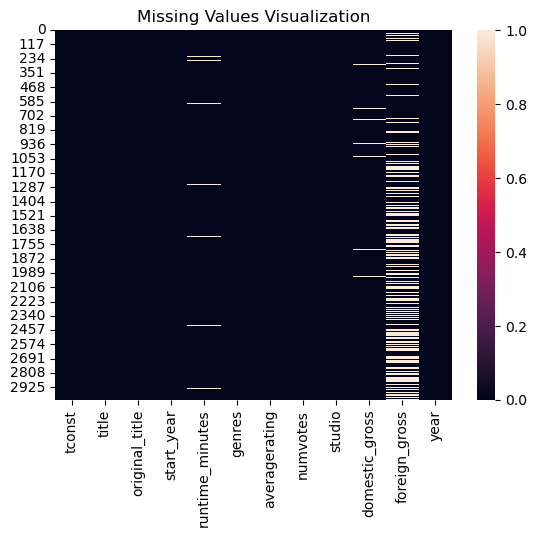

In [11]:
#visualize missing values using seaborn heatmap
sns.heatmap(data.isna())
plt.title("Missing Values Visualization")
plt.show()

In [12]:
#Representing missing values as a percentage
missing_per = data.isna().sum()*100/len(data)
missing_per

tconst              0.000000
title               0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes     1.552692
genres              0.231252
averagerating       0.000000
numvotes            0.000000
studio              0.099108
domestic_gross      0.726792
foreign_gross      39.478031
year                0.000000
dtype: float64

*Drop All Missing Values in Dataset*

In [13]:
data = data.dropna(axis=0) #drop rows containing containing missing values
data

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3008,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
3010,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
3017,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


*Dealing with Duplicated Data*

In [14]:
#identify duplicate data
dup_rows = data[data.duplicated()]
dup_rows

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year


In [15]:
print("Number of Duplicates:", data.duplicated().sum())

Number of Duplicates: 0


In [16]:
data = data.drop_duplicates()
data

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
3008,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
3010,tt7784604,Hereditary,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
3017,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


In [17]:
data.isna().sum() #Confirming we do not have any missing values in our final dataset

tconst             0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

*Dropping additional columns that we do not require in final data and reseting index*

In [18]:
data = data.drop(columns=['tconst','start_year','original_title'])

In [19]:
data = data.reset_index(drop=True)
data

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1765,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


*Checking for special characters*

In [20]:
data.dtypes

title               object
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [21]:
data['foreign_gross'] = data['foreign_gross'].str.replace('\W', '', regex=True)

In [22]:
data.dtypes

title               object
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

__Final Data__

In [23]:
data

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,On the Road,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,On the Road,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...
1762,Detective Chinatown 2,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1763,Hereditary,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1764,Nobody's Fool,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1765,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


__Getting the overall statistics about the dataset__

In [24]:
data.describe() # displays statistics of numerical columns

,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,1767.000000,1767.000000,1.767000e+03,1.767000e+03,1767.000000
mean,107.895869,6.459706,9.692010e+04,5.008103e+07,2013.666101
std,20.105904,0.991033,1.539057e+05,8.101089e+07,2.572505
min,3.000000,1.600000,5.000000e+00,4.000000e+02,2010.000000
25%,95.000000,5.900000,6.392500e+03,1.300000e+06,2011.000000
50%,106.000000,6.500000,3.987000e+04,2.110000e+07,2014.000000
75%,119.000000,7.100000,1.171330e+05,6.120000e+07,2016.000000
max,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


__Interpretaition of above statistics:__\
*Data set contains movies from year 2010 (min) to 2018 (max)\
Average rating is 6.5 with minimum rating at 1.6 and maximum rating at 9.2\
Average movies running minutes 108 mins with minimum at 3 mins and maximum at 272 mins*


__Data Visualization Techniques__\
Displaying number of movies released & revenues generated per year

In [25]:
data.columns

Index(['title', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

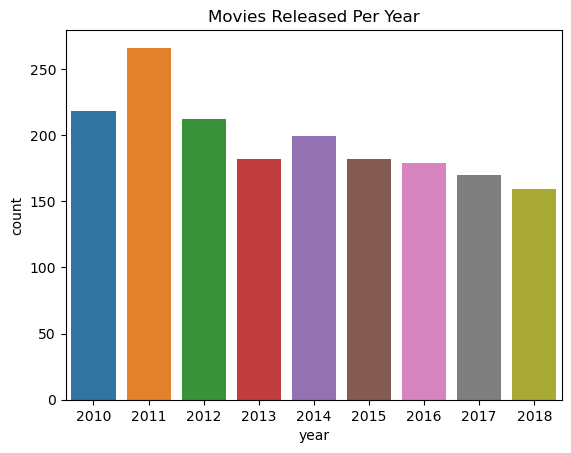

In [26]:
#Number of movies released per year
sns.countplot(x='year',data=data)
plt.title ("Movies Released Per Year")
plt.show()

In [34]:
#average revenues generated annually
data.groupby('year')['domestic_gross'].mean().sort_values(ascending=False)

year
2017    6.237230e+07
2018    6.191098e+07
2015    6.100297e+07
2013    5.842689e+07
2016    5.618384e+07
2014    4.571986e+07
2010    4.135340e+07
2012    4.108671e+07
2011    3.544821e+07
Name: domestic_gross, dtype: float64

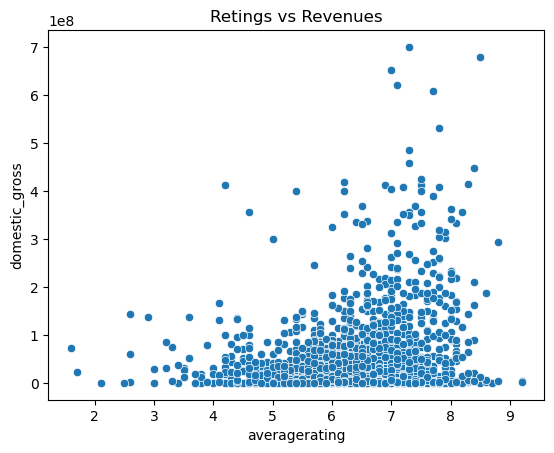

In [36]:
#checking relationship between variables
sns.scatterplot(x='averagerating', y='domestic_gross', data=data)
plt.title("Ratings vs Revenues")
plt.show()

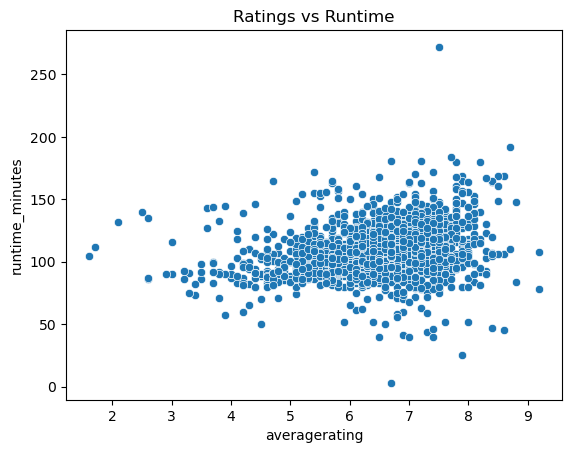

In [38]:
#checking relationship between variables
sns.scatterplot(x='averagerating', y='runtime_minutes', data=data)
plt.title("Ratings vs Runtime")
plt.show()